In [5]:
# Randomly divide basins to train and test basins
import sys, os, glob, pickle, toml, json, pickle, random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import cartopy.crs as ccrs
import cartopy.feature as cfeature

def set_background(ax):
    ax.set_extent([-121, -72, 25, 50])

    # Background boundaries
    # ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray')
    
    return ax



In [6]:
# load info
infile_basin_info = f"/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv"
df_info = pd.read_csv(infile_basin_info)

In [7]:
outfile = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/LargeSampleEmulator_predict_ungauged/basin627_train_test_index.npz'

if os.path.isfile(outfile):
    dtmp = np.load(outfile)
    train_index = dtmp['train_index']
    test_index = dtmp['test_index']
else:
    test_index = np.arange(len(df_info))[::5]
    train_index = np.setdiff1d(np.arange(len(df_info)), test_index)
    
    # indices = np.arange(len(df_info))
    # train_index, test_index = train_test_split(indices, test_size=0.2, random_state=42)

    np.savez_compressed(outfile, test_index=test_index, train_index=train_index)
    
print('Train ratio:', len(train_index)/len(df_info))
print('Test ratio:', len(test_index)/len(df_info))
print(test_index)

Train ratio: 0.7990430622009569
Test ratio: 0.20095693779904306
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445
 450 455 460 465 470 475 480 485 490 495 500 505 510 515 520 525 530 535
 540 545 550 555 560 565 570 575 580 585 590 595 600 605 610 615 620 625]


In [13]:
# five batches 
for i in range(5):
    outfile = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/LargeSampleEmulator_predict_ungauged/basin627_train_test_index_batch{i+1}.npz'
    
    if os.path.isfile(outfile):
        dtmp = np.load(outfile)
        train_index = dtmp['train_index']
        test_index = dtmp['test_index']
    else:
        test_index = np.arange(len(df_info))[i::5]
        train_index = np.setdiff1d(np.arange(len(df_info)), test_index)
    
        np.savez_compressed(outfile, test_index=test_index, train_index=train_index)
        
    print('Train ratio:', len(train_index)/len(df_info))
    print('Test ratio:', len(test_index)/len(df_info))

Train ratio: 0.7990430622009569
Test ratio: 0.20095693779904306
Train ratio: 0.7990430622009569
Test ratio: 0.20095693779904306
Train ratio: 0.8006379585326954
Test ratio: 0.19936204146730463
Train ratio: 0.8006379585326954
Test ratio: 0.19936204146730463
Train ratio: 0.8006379585326954
Test ratio: 0.19936204146730463


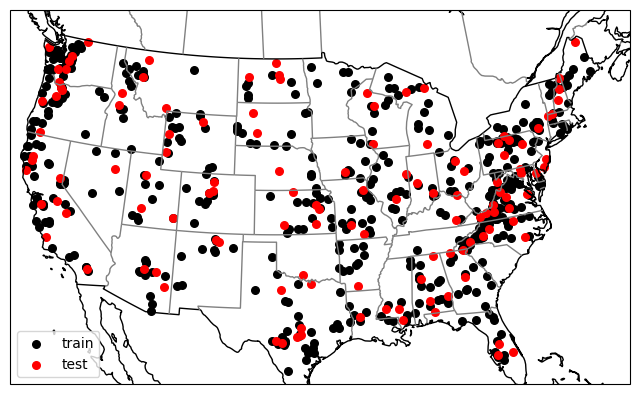

In [27]:
# plot train and test basins
lat = df_info['lat_cen'].values
lon = df_info['lon_cen'].values


fig = plt.figure(figsize=[8, 7])

proj = ccrs.AlbersEqualArea(central_longitude=-100)
transf = ccrs.PlateCarree()

ax = fig.add_subplot(1, 1, 1, projection=proj)
ax = set_background(ax)
p = ax.scatter(lon[train_index], lat[train_index], 30, color='k', transform=transf, label='train')
p = ax.scatter(lon[test_index], lat[test_index], 30, color='r', transform=transf, label='test')

plt.legend()
plt.savefig('LSE_traintest_basin_for_prediction.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()